In [3]:
%pylab inline
import numpy as np
from pygadgetreader import *
from octopus import density

Populating the interactive namespace from numpy and matplotlib


In [32]:
ic_snap = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pos', 'dm')
ic_vel = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'vel', 'dm')

fc_snap = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pos', 'dm')
fc_vel = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'vel', 'dm')

Returning DM    Positions
Returning DM    Velocities
Returning DM    Positions
Returning DM    Velocities


In [34]:
index_cut_i = np.where(np.sqrt((ic_snap[:,0]**2.0) + (ic_snap[:,1]**2.0) + (ic_snap[:,2]**2.0))<500)[0]
index_cut_f = np.where(np.sqrt((fc_snap[:,0]**2.0) + (fc_snap[:,1]**2.0) + (fc_snap[:,2]**2.0))<500)[0]

fc_snap = fc_snap[index_cut_f]
fc_vel = fc_vel[index_cut_f]

ic_snap = ic_snap[index_cut_i]
ic_vel = ic_vel[index_cut_i]

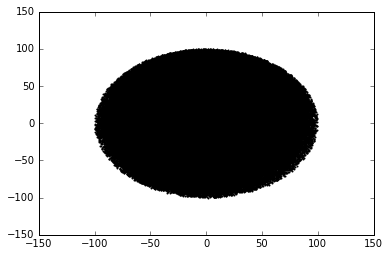

In [17]:
scatter(fc_snap[:,0], fc_snap[:,1], s=1)

In [18]:
def slicing(xyz, dr, r, direction=0):
    index_slice = np.where((xyz[:,direction]<dr+r) & (xyz[:,direction]>r-dr))[0]
    return xyz[index_slice,0], xyz[index_slice,1], xyz[index_slice,2]

In [19]:
slices = np.linspace(-50, 50, 101)
print slices


[-50. -49. -48. -47. -46. -45. -44. -43. -42. -41. -40. -39. -38. -37. -36.
 -35. -34. -33. -32. -31. -30. -29. -28. -27. -26. -25. -24. -23. -22. -21.
 -20. -19. -18. -17. -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.
  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.
  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.
  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.
  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.]


In [30]:
for i in range(len(slices)):
    print i
    xyz_ic = slicing(fc_snap, 1, slices[i], 0)
    rho_ic = density.grid(xyz_ic[1], xyz_ic[2], xyz_ic[0], 50)
    imshow(np.log10(rho_ic.T), origin='lower', 
           extent=[min(xyz_ic[1]), max(xyz_ic[1]), min(xyz_ic[2]), max(xyz_ic[2])], 
           cmap='terrain',vmin=-9, vmax=2)
    colorbar()
    savefig('slices/slice_{}.png'.format(i))
    clf()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


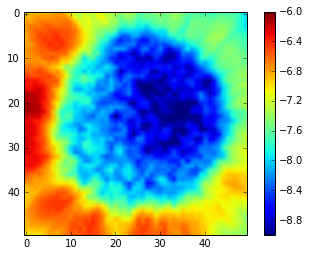

In [29]:
imshow(np.log10(rho_ic.T), vmin=-9, vmax=-6)
colorbar()

In [35]:
# phase space
r_i = np.sqrt(ic_snap[:,0]**2.0 + ic_snap[:,1]**2.0 + ic_snap[:,2]**2.0)
r_f = np.sqrt(fc_snap[:,0]**2.0 + fc_snap[:,1]**2.0 + fc_snap[:,2]**2.0)
v_i = np.sqrt(ic_vel[:,0]**2.0 + ic_vel[:,1]**2.0 + ic_vel[:,2]**2.0)
v_f = np.sqrt(fc_vel[:,0]**2.0 + fc_vel[:,1]**2.0 + fc_vel[:,2]**2.0)


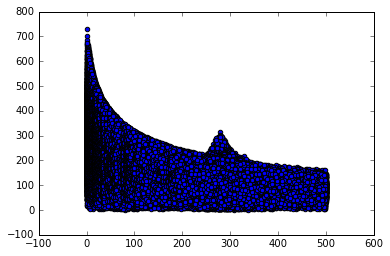

In [36]:
scatter(r_i, v_i, s=0.1)